In [ ]:

from keras.datasets import imdb


In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
word_index = imdb.get_word_index()
reversed_list = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reversed_list.get(i-3, '?') for i in train_data[0]])
print(decode_review)

1646592/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [ ]:
len(test_data)

25000

In [ ]:
train_data.shape

(25000,)

In [ ]:
"Python".ljust(12, "*")

'Python******'

In [ ]:
import numpy as np
def vectorize_sequences(seq, dim=10000):
  res = np.zeros((len(seq), dim))
  for i, seq in enumerate(seq):
    res[i, seq] = 1.
  return res


In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_val = x_train[:10000]
x_partial_train = x_train[10000:]
y_val = y_train[:10000]
y_partial_train = y_train[10000:] 

In [ ]:
import time
start = time.time()
model.fit(x_partial_train, y_partial_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
end = time.time()
print(end-start)

Epoch 1/4
30/30 [==============================] - 1s 29ms/step - loss: 0.5232 - accuracy: 0.7794 - val_loss: 0.3912 - val_accuracy: 0.8708
Epoch 2/4
30/30 [==============================] - 1s 17ms/step - loss: 0.3054 - accuracy: 0.9037 - val_loss: 0.3054 - val_accuracy: 0.8835
Epoch 3/4
30/30 [==============================] - 1s 18ms/step - loss: 0.2218 - accuracy: 0.9263 - val_loss: 0.2760 - val_accuracy: 0.8934
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1735 - accuracy: 0.9431 - val_loss: 0.2988 - val_accuracy: 0.8800
4.991288900375366


In [ ]:
summary = model.history.history
summary.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

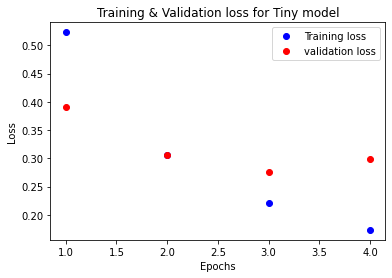

In [ ]:
loss_values = summary['loss']
val_loss = summary['val_loss']
epochs = range(1, 5)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for Tiny model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3155 - accuracy: 0.8721


[0.31554821133613586, 0.8720800280570984]

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_r = models.Sequential()
model_r.add(layers.Dense(16, activation='relu',
                         kernel_regularizer=regularizers.l2(0.1), input_shape=(10000, )))
model_r.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.1)))
model_r.add(layers.Dense(1, activation='sigmoid'))

model_r.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
model_r.fit(x_partial_train, y_partial_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
end = time.time()
print(end-start)

Epoch 1/10
30/30 [==============================] - 1s 26ms/step - loss: 2.5120 - accuracy: 0.7224 - val_loss: 1.8863 - val_accuracy: 0.8359
Epoch 2/10
30/30 [==============================] - 1s 18ms/step - loss: 1.7578 - accuracy: 0.8201 - val_loss: 1.6328 - val_accuracy: 0.8250
Epoch 3/10
30/30 [==============================] - 1s 18ms/step - loss: 1.5204 - accuracy: 0.8264 - val_loss: 1.4387 - val_accuracy: 0.7454
Epoch 4/10
30/30 [==============================] - 1s 18ms/step - loss: 1.3248 - accuracy: 0.8156 - val_loss: 1.2584 - val_accuracy: 0.7596
Epoch 5/10
30/30 [==============================] - 1s 18ms/step - loss: 1.1590 - accuracy: 0.8242 - val_loss: 1.1186 - val_accuracy: 0.7280
Epoch 6/10
30/30 [==============================] - 1s 18ms/step - loss: 1.0225 - accuracy: 0.8287 - val_loss: 0.9664 - val_accuracy: 0.8301
Epoch 7/10
30/30 [==============================] - 1s 18ms/step - loss: 0.9165 - accuracy: 0.8181 - val_loss: 0.8855 - val_accuracy: 0.7924
Epoch 8/10
30

In [ ]:
summary_r = model_r.history.history
summary_r.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

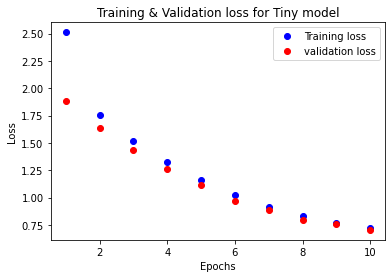

In [ ]:
loss_values= summary_r['loss']
val_loss = summary_r['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for Tiny model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_r.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7069 - accuracy: 0.8331


[0.7068918943405151, 0.8331199884414673]

**Multilayer model**

In [ ]:
model_mul = models.Sequential()
model_mul.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model_mul.add(layers.Dense(32, activation='relu'))
model_mul.add(layers.Dense(32, activation='relu'))
model_mul.add(layers.Dense(32, activation='relu'))
model_mul.add(layers.Dense(1, activation='sigmoid'))

model_mul.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
model_mul.fit(x_partial_train, y_partial_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
end = time.time()
print(end-start)

Epoch 1/4
30/30 [==============================] - 1s 27ms/step - loss: 0.5274 - accuracy: 0.7681 - val_loss: 0.3759 - val_accuracy: 0.8553
Epoch 2/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2923 - accuracy: 0.8947 - val_loss: 0.3136 - val_accuracy: 0.8771
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2010 - accuracy: 0.9291 - val_loss: 0.2799 - val_accuracy: 0.8891
Epoch 4/4
30/30 [==============================] - 1s 18ms/step - loss: 0.1613 - accuracy: 0.9419 - val_loss: 0.2927 - val_accuracy: 0.8887
3.559316635131836


In [ ]:
summary_mul = model_mul.history.history
summary_mul.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

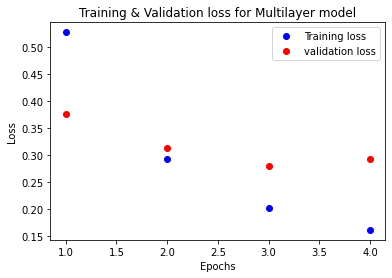

In [ ]:
loss_values= summary_mul['loss']
val_loss = summary_mul['val_loss']
epochs = range(1, 5)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for Multilayer model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_mul.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3173 - accuracy: 0.8770


[0.31733062863349915, 0.8770400285720825]

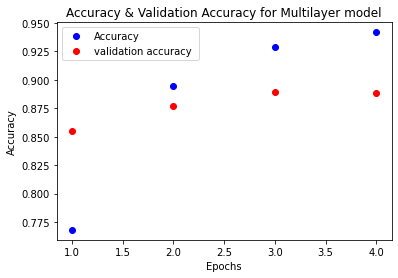

In [ ]:
accuracy= summary_mul['accuracy']
val_accuracy = summary_mul['val_accuracy']
epochs = range(1, 5)
plt.plot(epochs, accuracy, 'bo', label = "Accuracy")
plt.plot(epochs, val_accuracy, 'ro', label = "validation accuracy ")
plt.title('Accuracy & Validation Accuracy for Multilayer model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Adding More units to Hidden layers**

In [ ]:
model_hid = models.Sequential()
model_hid.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model_hid.add(layers.Dense(64, activation='relu'))
model_hid.add(layers.Dense(64, activation='relu'))
model_hid.add(layers.Dense(1, activation='sigmoid'))

model_hid.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
model_hid.fit(x_partial_train, y_partial_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
end = time.time()
print(end-start)

Epoch 1/4
30/30 [==============================] - 1s 24ms/step - loss: 0.5014 - accuracy: 0.7641 - val_loss: 0.3223 - val_accuracy: 0.8785
Epoch 2/4
30/30 [==============================] - 1s 17ms/step - loss: 0.2707 - accuracy: 0.8967 - val_loss: 0.3657 - val_accuracy: 0.8496
Epoch 3/4
30/30 [==============================] - 1s 17ms/step - loss: 0.1872 - accuracy: 0.9314 - val_loss: 0.3408 - val_accuracy: 0.8699
Epoch 4/4
30/30 [==============================] - 1s 17ms/step - loss: 0.1639 - accuracy: 0.9401 - val_loss: 0.2924 - val_accuracy: 0.8874
3.2272696495056152


In [ ]:
summary_hid = model_hid.history.history
summary_hid.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

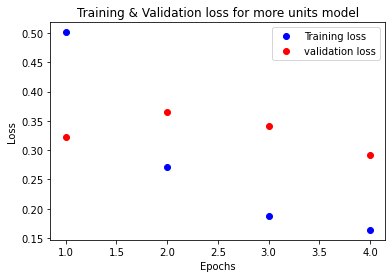

In [ ]:
loss_values= summary_hid['loss']
val_loss = summary_hid['val_loss']
epochs = range(1, 5)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for more units model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

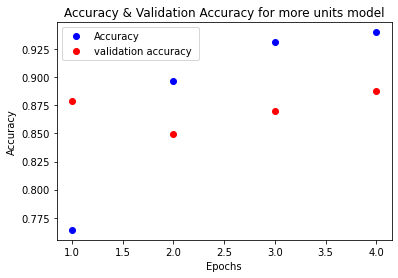

In [ ]:
accuracy= summary_hid['accuracy']
val_accuracy = summary_hid['val_accuracy']
epochs = range(1, 5)
plt.plot(epochs, accuracy, 'bo', label = "Accuracy")
plt.plot(epochs, val_accuracy, 'ro', label = "validation accuracy ")
plt.title('Accuracy & Validation Accuracy for more units model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_hid.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3189 - accuracy: 0.8758


[0.3189347982406616, 0.8758000135421753]

**Changing Activation Function**

In [ ]:
model_tan = models.Sequential()
model_tan.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model_tan.add(layers.Dense(16, activation='tanh'))
model_tan.add(layers.Dense(1, activation='sigmoid'))

model_tan.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
model_tan.fit(x_partial_train, y_partial_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
end = time.time()
print(end-start)

Epoch 1/10
30/30 [==============================] - 1s 25ms/step - loss: 0.4939 - accuracy: 0.8059 - val_loss: 0.3845 - val_accuracy: 0.8719
Epoch 2/10
30/30 [==============================] - 1s 18ms/step - loss: 0.3044 - accuracy: 0.9079 - val_loss: 0.3199 - val_accuracy: 0.8778
Epoch 3/10
30/30 [==============================] - 1s 18ms/step - loss: 0.2210 - accuracy: 0.9313 - val_loss: 0.2922 - val_accuracy: 0.8823
Epoch 4/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1678 - accuracy: 0.9497 - val_loss: 0.2704 - val_accuracy: 0.8908
Epoch 5/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1270 - accuracy: 0.9625 - val_loss: 0.3279 - val_accuracy: 0.8691
Epoch 6/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1038 - accuracy: 0.9691 - val_loss: 0.3079 - val_accuracy: 0.8828
Epoch 7/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0822 - accuracy: 0.9767 - val_loss: 0.3339 - val_accuracy: 0.8799
Epoch 8/10
30

In [ ]:
summary_tan = model_tan.history.history
summary_tan.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

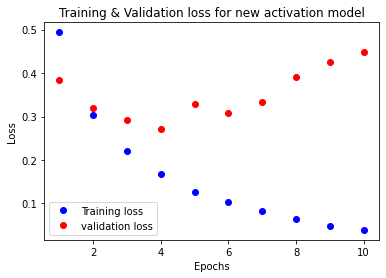

In [ ]:
loss_values= summary_tan['loss']
val_loss = summary_tan['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for new activation model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

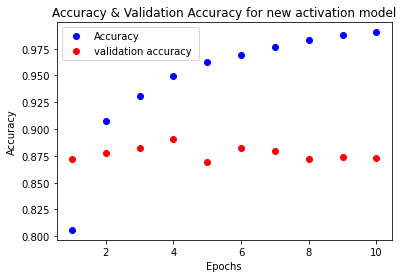

In [ ]:
accuracy= summary_tan['accuracy']
val_accuracy = summary_tan['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, accuracy, 'bo', label = "Accuracy")
plt.plot(epochs, val_accuracy, 'ro', label = "validation accuracy ")
plt.title('Accuracy & Validation Accuracy for new activation model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_tan.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.5013 - accuracy: 0.8591


[0.501252293586731, 0.8591200113296509]

**Changing the loss function model**

In [ ]:
model_ms = models.Sequential()
model_ms.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model_ms.add(layers.Dense(16, activation='tanh'))
model_ms.add(layers.Dense(1, activation='sigmoid'))

model_ms.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [ ]:
start = time.time()
model_ms.fit(x_partial_train, y_partial_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
end = time.time()
print(end-start)

Epoch 1/10
30/30 [==============================] - 1s 24ms/step - loss: 0.1618 - accuracy: 0.7884 - val_loss: 0.1198 - val_accuracy: 0.8555
Epoch 2/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0842 - accuracy: 0.9085 - val_loss: 0.0878 - val_accuracy: 0.8927
Epoch 3/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0570 - accuracy: 0.9352 - val_loss: 0.0828 - val_accuracy: 0.8919
Epoch 4/10
30/30 [==============================] - 1s 17ms/step - loss: 0.0418 - accuracy: 0.9521 - val_loss: 0.0820 - val_accuracy: 0.8884
Epoch 5/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0334 - accuracy: 0.9614 - val_loss: 0.0903 - val_accuracy: 0.8790
Epoch 6/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0242 - accuracy: 0.9748 - val_loss: 0.0904 - val_accuracy: 0.8792
Epoch 7/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0196 - accuracy: 0.9793 - val_loss: 0.0940 - val_accuracy: 0.8782
Epoch 8/10
30

In [ ]:
summary_ms = model_ms.history.history
summary_ms.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

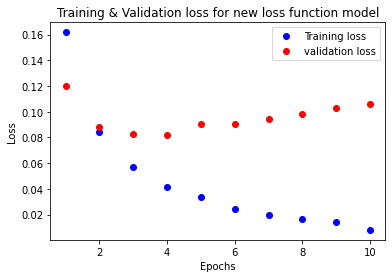

In [ ]:
loss_values= summary_ms['loss']
val_loss = summary_ms['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for new loss function model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

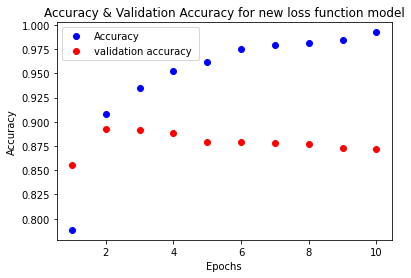

In [ ]:
accuracy= summary_ms['accuracy']
val_accuracy = summary_ms['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, accuracy, 'bo', label = "Accuracy")
plt.plot(epochs, val_accuracy, 'ro', label = "validation accuracy ")
plt.title('Accuracy & Validation Accuracy for new loss function model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_ms.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.1157 - accuracy: 0.8610


[0.11570567637681961, 0.8610399961471558]

**Changing the optimizer to adam**

In [ ]:
model_adam = models.Sequential()
model_adam.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model_adam.add(layers.Dense(16, activation='tanh'))
model_adam.add(layers.Dense(1, activation='sigmoid'))

model_adam.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
model_adam.fit(x_partial_train, y_partial_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
end = time.time()
print(end-start)

Epoch 1/10
30/30 [==============================] - 1s 24ms/step - loss: 0.5317 - accuracy: 0.7797 - val_loss: 0.3951 - val_accuracy: 0.8537
Epoch 2/10
30/30 [==============================] - 1s 18ms/step - loss: 0.2949 - accuracy: 0.9011 - val_loss: 0.2931 - val_accuracy: 0.8860
Epoch 3/10
30/30 [==============================] - 1s 17ms/step - loss: 0.1979 - accuracy: 0.9357 - val_loss: 0.2736 - val_accuracy: 0.8892
Epoch 4/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1445 - accuracy: 0.9579 - val_loss: 0.2776 - val_accuracy: 0.8858
Epoch 5/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1087 - accuracy: 0.9712 - val_loss: 0.2958 - val_accuracy: 0.8814
Epoch 6/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0819 - accuracy: 0.9812 - val_loss: 0.3203 - val_accuracy: 0.8791
Epoch 7/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0610 - accuracy: 0.9881 - val_loss: 0.3403 - val_accuracy: 0.8762
Epoch 8/10
30

In [ ]:
summary_adam = model_adam.history.history
summary_adam.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

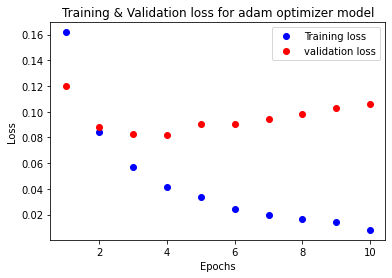

In [ ]:
loss_values= summary_ms['loss']
val_loss = summary_ms['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for adam optimizer model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

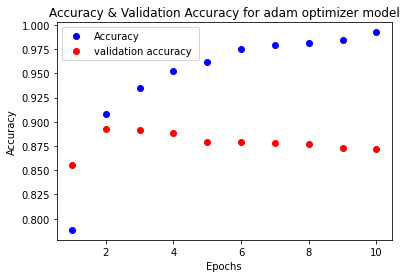

In [ ]:
accuracy= summary_ms['accuracy']
val_accuracy = summary_ms['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, accuracy, 'bo', label = "Accuracy")
plt.plot(epochs, val_accuracy, 'ro', label = "validation accuracy ")
plt.title('Accuracy & Validation Accuracy for adam optimizer model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Logistic Classification**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
lr.fit(x_partial_train, y_partial_train)
lr_pred = lr.predict(x_test)
print("Accuaracy score using Logistic Regression model:",accuracy_score(lr_pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuaracy score using Logistic Regression model: 0.8608


In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])